<a id='section_id3'></a>
## Simulation Elektrolyseur Sommerbetrieb

Idee: Aufwand für Leistungselektronik geringer und Effizienz besser wenn Stack dauerhaft mit Nennlast betrieben wird. In Kombination mit Batterie für Tag-Nacht-Speicherung und Betrieb Elektrolyseur nur über den Sommer (1.März bis 1.Oktober) wird ein positiver Effekt auf Wirtschaftlichkeit und Ökologie erhofft. Wahrscheinlich weitere Verbesserung wenn nur tagsüber betrieben wird.

Elektrolyseur wird als 800W ausführung zu Verbrauchern addiert und Batterie wie bisher auf ökonom. und ökolog. Optimum ausgelegt. Zur Kosteneinsparung wird dann der produzierte Wasserstofferlös addiert abzüglich Elektrolyseurkosten mit 800W*Systemkosten

\
Verwendete Skripte:\
[Parameter Base Case](parameter_base_case.py)\
[Hilfsfunktionen](own_utility_functions.py)\
[Speicher](speicher.py)\
[Wirtschaftlichkeit](wirtschaftlichkeit.py)\
[Umwelteinfluss](umwelteinfluss.py)


In [1]:
from parameter_base_case import *

LastprofilNr=31
Nummer = str(LastprofilNr)
directory = directory_data+'Lastprofil_' + Nummer +'.npy'
with open(directory, 'rb') as f:
    [P_verbraucher_alt, P_pv, P_dif_alt, P_def_alt, P_ueber_alt] = np.load(f)

P_Elektrolyseur=800
startmonat=3
endmonat=9

## Untersuchung Einfluss auf Überschuss und Defizit

(0, 50)

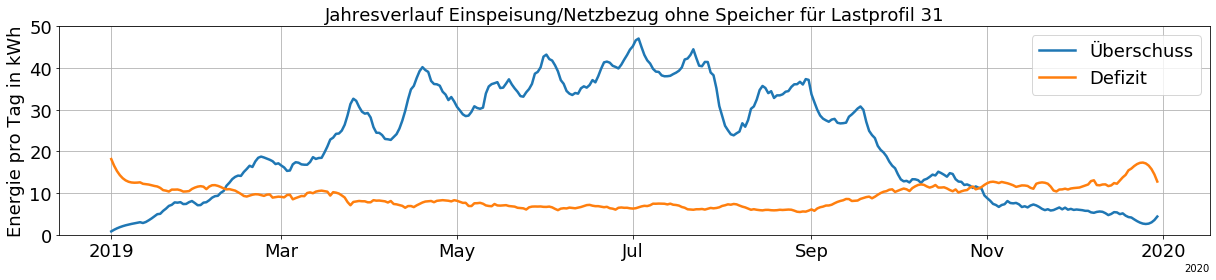

In [2]:


#Glättungsfunktion Fenstergröße
windowsize_smooth=21 #muss ungerade sein


##Ohne Elektrolyseur
taegl_defizit = initialize_year_array('D',0)
taegl_ueberschuss = initialize_year_array('D',0)
for i, value in enumerate(P_dif_alt):
    if i%(60*24)== 0:
        taegl_ueberschuss[int(i/60/24)] = np.sum(P_ueber_alt[i-60*24:i])/60/1000
        taegl_defizit[int(i/60/24)] = np.sum(P_def_alt[i-60*24:i])/60/1000
taegl_defizit[0]=15

taegl_ueberschuss_smooth = savgol_filter(taegl_ueberschuss, windowsize_smooth, 3)
ax=vis.plot_timeline(year_dayres, taegl_ueberschuss_smooth,'Energie pro Tag in kWh','Jahresverlauf Einspeisung/Netzbezug\
 ohne Speicher für Lastprofil '+ Nummer )
                                  
                    
legend=['Überschuss']
taegl_defizit_smooth = savgol_filter(taegl_defizit, windowsize_smooth, 3)
legend.append('Defizit')
vis.addtoplot_timeline(ax, year_dayres, taegl_defizit_smooth, legend,'upper right')


ax.set_ylim(0,50)


#plt.ylim(0,50)

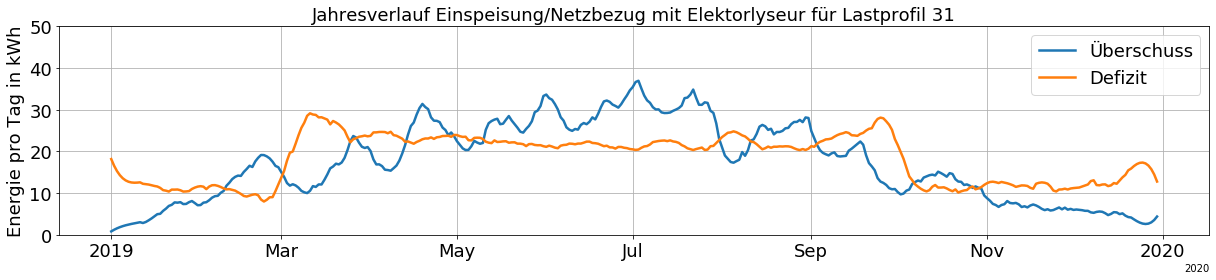

In [6]:
##elektrolyseur dauerbetrieb über sommer
P_verbraucher=np.copy(P_verbraucher_alt)
P_verbraucher[int(len(P_verbraucher_alt)/12*(startmonat-1)):int(len(P_verbraucher_alt)/12*endmonat)]=\
    P_verbraucher_alt[int(len(P_verbraucher_alt)/12*(startmonat-1)):int(len(P_verbraucher_alt)/12*endmonat)]+P_Elektrolyseur


P_dif = P_pv-P_verbraucher
P_def = negval_cutoff(-P_dif)
P_ueber = negval_cutoff(P_dif)
E_verbraucher = jahresenergie_kWh(P_verbraucher)
E_def = jahresenergie_kWh(P_def)
E_ueber = jahresenergie_kWh(P_ueber)

taegl_defizit_sommerbetrieb = initialize_year_array('D',0)
taegl_ueberschuss_sommerbetrieb = initialize_year_array('D',0)
for i, value in enumerate(P_dif):
    if i%(60*24)== 0:
        taegl_ueberschuss_sommerbetrieb[int(i/60/24)] = np.sum(P_ueber[i-60*24:i])/60/1000
        taegl_defizit_sommerbetrieb[int(i/60/24)] = np.sum(P_def[i-60*24:i])/60/1000
taegl_defizit_sommerbetrieb[0]=15

taegl_ueberschuss_smooth = savgol_filter(taegl_ueberschuss_sommerbetrieb, windowsize_smooth, 3)
taegl_defizit_smooth = savgol_filter(taegl_defizit_sommerbetrieb, windowsize_smooth, 3)
legend=['Überschuss']
ax=vis.plot_timeline(year_dayres, taegl_ueberschuss_smooth,'Energie pro Tag in kWh','Jahresverlauf Einspeisung/Netzbezug\
 mit Elektorlyseur für Lastprofil '+ Nummer )
legend.append('Defizit')
vis.addtoplot_timeline(ax, year_dayres, taegl_defizit_smooth, legend,'upper right')

ax.set_ylim(0,50)

vis.save_to_tex('Diagramm_ueberschuss_defizit_elektrolyeurSommerbetrieb'+file_extension,ax)



(0, 50)

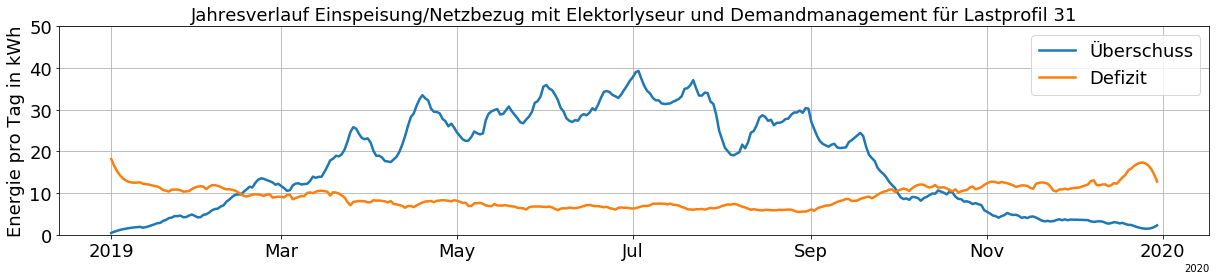

In [4]:
#elektrolyseur ein wenn genügend überschuss --> Demand Management
P_verbraucher=np.copy(P_verbraucher_alt)
for i,value in enumerate(P_ueber_alt):
    if value>P_Elektrolyseur:
        P_verbraucher[i]=P_verbraucher_alt[i]+P_Elektrolyseur
        
P_dif = P_pv-P_verbraucher
P_def = negval_cutoff(-P_dif)
P_ueber = negval_cutoff(P_dif)
E_verbraucher = jahresenergie_kWh(P_verbraucher)
E_def = jahresenergie_kWh(P_def)
E_ueber = jahresenergie_kWh(P_ueber)

taegl_defizit = initialize_year_array('D',0)
taegl_ueberschuss = initialize_year_array('D',0)
for i, value in enumerate(P_dif):
    if i%(60*24)== 0:
        taegl_ueberschuss[int(i/60/24)] = np.sum(P_ueber[i-60*24:i])/60/1000
        taegl_defizit[int(i/60/24)] = np.sum(P_def[i-60*24:i])/60/1000
taegl_defizit[0]=15

taegl_ueberschuss_smooth = savgol_filter(taegl_ueberschuss, windowsize_smooth, 3)
taegl_defizit_smooth = savgol_filter(taegl_defizit, windowsize_smooth, 3)

ax=vis.plot_timeline(year_dayres, taegl_ueberschuss_smooth,'Energie pro Tag in kWh','Jahresverlauf Einspeisung/Netzbezug\
 mit Elektorlyseur und Demandmanagement für Lastprofil '+ Nummer )

legend=['Überschuss']
taegl_defizit_smooth = savgol_filter(taegl_defizit, windowsize_smooth, 3)
legend.append('Defizit')
vis.addtoplot_timeline(ax, year_dayres, taegl_defizit_smooth, legend,'upper right')

ax.set_ylim(0,50)

## Implementierung für Simulation mit verschiedenen Lastprofilen

wird in Simulation gesamt kopiert und dort eingesetzt

Lastprofilnr. 31
<Simulationsfortschritt>
....................

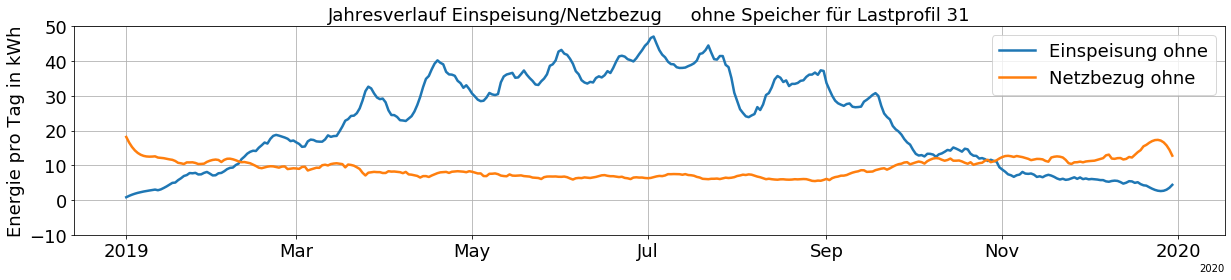

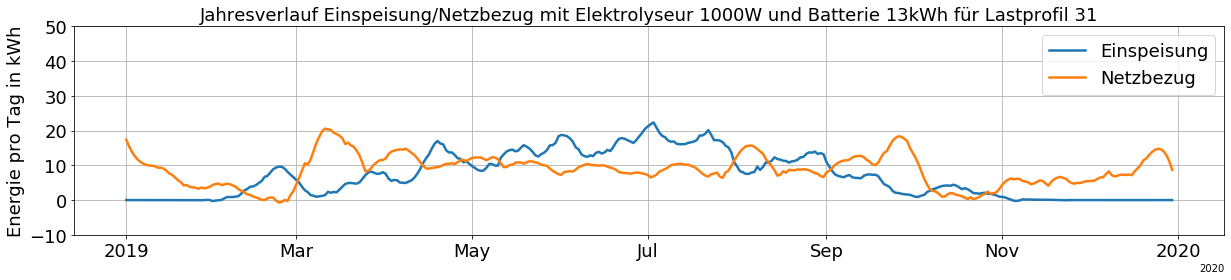

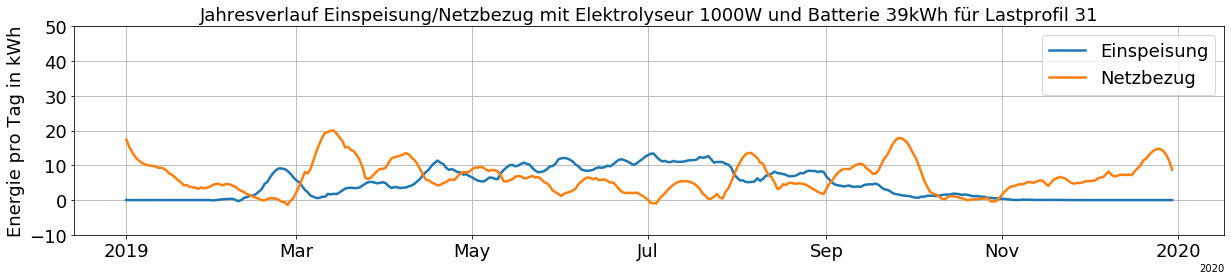

Elapsed time: 37.633391 seconds.
E_netz_jahr (Elektrolyseur wird hier nicht zu Verbrauchern gezählt) =  3369.0963757897525
E_eigen_ohne_jahr (Elektrolyseur wird hier nicht zu Verbrauchern gezählt) =  1949.0585742102476
K_einspar_P2G =  607.03
K_einspar_bat =  372.15308014511413
E_max_bat_kosten_opt =  13.68421052631579
E_max_bat_CO2_opt =  39.73684210526316
CO2prokWh_ohne =  0.253403400800855
CO2 pro kWh mit Speicher (Elektrolyseur wird hier nicht zu Verbrauchern gezählt) =  -0.07586904294357613
Kosteneinsparung_gesamt =  979.1830801451141


In [5]:
plot_detail=1
P_Elektrolyseur=1000
startmonat=3
endmonat=9 #wird mitgerechnet

#Glättungsfunktion Fenstergröße
windowsize_smooth=21 #muss ungerade sein

E_bat_max_array_new=np.linspace(5,max(E_bat_max_array)*3,bat_res)

print('Lastprofilnr.',int(LastprofilNr));
##Beginn Simulationsfortschrittanzeige
print('<Simulationsfortschritt>')
########################################################################

tic()
##Lastprofile und Energiebilanzen berechnen#############################
P_verbraucher_alt=np.copy(Lastprofile[:,LastprofilNr])
P_verbraucher=np.copy(P_verbraucher_alt)
P_verbraucher[int(len(P_verbraucher_alt)/12*(startmonat-1)):int(len(P_verbraucher_alt)/12*endmonat)]=P_verbraucher_alt[int(len(P_verbraucher_alt)/12*(startmonat-1)):int(len(P_verbraucher_alt)/12*endmonat)]+P_Elektrolyseur
E_jahr_P2G=P_Elektrolyseur*(endmonat-startmonat + 1)*30.5*24/1000
P_pv = pv.calculate_power(G_h, z, P_peak, PR, G_stc, v, inclination)

P_dif = P_pv-P_verbraucher
P_def = negval_cutoff(-P_dif)
P_ueber = negval_cutoff(P_dif)
E_ueber = jahresenergie_kWh(P_ueber)
E_verbraucher = jahresenergie_kWh(P_verbraucher)
E_netz = jahresenergie_kWh(P_def)
E_def=E_netz
E_eigen = E_verbraucher-E_netz

E_verbraucher_alt=jahresenergie_kWh(P_verbraucher_alt)
E_netz_alt=jahresenergie_kWh(negval_cutoff(-(P_pv-P_verbraucher_alt)))
E_eigen_alt = E_verbraucher_alt-E_netz_alt
#######################################################################


##Speicherauslegung####################################################
#Batterie
first=0
E_jahr_bat=np.zeros(np.size(E_bat_max_array))
for i,value in enumerate(E_bat_max_array_new):
    E_bat,P_bat_charge,P_bat_discharge = speicher.batterie_lastprofile(P_dif, P_bat_charge_max, \
        P_bat_discharge_max, eff_bat, value)
    E_jahr_bat[i] = jahresenergie_kWh(P_bat_discharge)    # Eigennutzung Solar durch Batterie
    print('.',end="")#Simulationsfortschritt
#########################################################################


###Kennzahlen
##Kosteneinsparung#######################################################
#Batterie
ax, K_einspar_bat_array=wirtschaftlichkeit.batterie(E_jahr_bat,E_bat_max_array_new,eff_bat,\
    c_netz,c_einspeisung,K_system_batterie);
plt.close()
K_einspar_bat=max(K_einspar_bat_array)
#P2G
K_einspar_P2G=wasserstoffverguetung*P_Elektrolyseur/1000*24*30.5*(endmonat - startmonat + 1)*eff_elektrolyse - P_Elektrolyseur*K_system_wasserstoff
#########################################################################


##Optimalauslegung#######################################################
#Batterie
i_kosten_opt_bat=find_value(K_einspar_bat_array,K_einspar_bat)
E_max_bat_kosten_opt=E_bat_max_array_new[i_kosten_opt_bat]
#Für CO2 Optimum wird hier nicht nulldurchgang gesucht sondern -Einsparung_P2G damit gesamteinsparung im CO2 optimum =0 ist
i_CO2_opt_bat=findr_value(K_einspar_bat_array,-K_einspar_P2G)
E_max_bat_CO2_opt=E_bat_max_array_new[i_CO2_opt_bat]
########################################################################


##CO2-Emmisionen########################################################
#ohne Speicher
CO2_20Jahre_ohne=E_netz_alt*Strommix_CO2*20
CO2prokWh_ohne=CO2_20Jahre_ohne/20/E_verbraucher_alt

##Batterie
#CO2_20jahre_bat=(E_def-E_jahr_bat[i_CO2_opt_bat])*Strommix_CO2*20+Batterie_CO2*E_max_bat_CO2_opt
#CO2prokWh_bat=CO2_20jahre_bat/20/E_verbraucher
##P2G
#CO2_20jahre_P2G=H2System_CO2*P_Elektrolyseur/1000-Dampfreformierung_CO2*E_jahr_P2G*20
##CO2 gesamt
#CO2prokWh_gesamt=(CO2_20jahre_bat+CO2_20jahre_P2G)/20/E_verbraucher_alt

CO2_20jahre_gesamt=(E_def-E_jahr_bat[i_CO2_opt_bat])*Strommix_CO2*20+Batterie_CO2*E_max_bat_CO2_opt+\
    H2System_CO2*P_Elektrolyseur/1000-Dampfreformierung_CO2*E_jahr_P2G*20
CO2prokWh_gesamt=CO2_20jahre_gesamt/20/E_verbraucher_alt


########################################################################

if plot_detail>0:
    ##Ohne Speichersystem (und ohne Elektrolyseur)
    taegl_defizit = initialize_year_array('D',0)
    taegl_ueberschuss = initialize_year_array('D',0)
    for i, value in enumerate(P_dif_alt):
        if i%(60*24)== 0:
            taegl_ueberschuss[int(i/60/24)] = np.sum(P_ueber_alt[i-60*24:i])/60/1000
            taegl_defizit[int(i/60/24)] = np.sum(P_def_alt[i-60*24:i])/60/1000
    taegl_defizit[0]=15

    taegl_ueberschuss_smooth = savgol_filter(taegl_ueberschuss, windowsize_smooth, 3)
    ax=vis.plot_timeline(year_dayres, taegl_ueberschuss_smooth,'Energie pro Tag in kWh','Jahresverlauf Einspeisung/Netzbezug\
     ohne Speicher für Lastprofil '+ Nummer )


    legend=['Einspeisung ohne']
    taegl_defizit_smooth = savgol_filter(taegl_defizit, windowsize_smooth, 3)
    legend.append('Netzbezug ohne')
    vis.addtoplot_timeline(ax, year_dayres, taegl_defizit_smooth, legend,'upper right')


    ax.set_ylim(-10,50)
    
    #Wirtschaftliche Auslegung
    E_bat,P_bat_charge,P_bat_discharge = speicher.batterie_lastprofile(P_dif, P_bat_charge_max, \
    P_bat_discharge_max, eff_bat, E_max_bat_kosten_opt)
    P_dif = P_pv-P_verbraucher
    P_def = negval_cutoff(-P_dif)
    P_ueber = negval_cutoff(P_dif)
    P_def=P_def-P_bat_discharge
    P_ueber=P_ueber-P_bat_charge
    ##Mit Elektrolyseur Sommerbetrieb und Batterie im Kostenoptimum
    taegl_defizit = initialize_year_array('D',0)
    taegl_ueberschuss = initialize_year_array('D',0)
    for i, value in enumerate(P_dif):
        if i%(60*24)== 0:
            taegl_ueberschuss[int(i/60/24)] = np.sum(P_ueber[i-60*24:i])/60/1000
            taegl_defizit[int(i/60/24)] = np.sum(P_def[i-60*24:i])/60/1000
    taegl_defizit[0]=15
    taegl_ueberschuss_smooth = savgol_filter(taegl_ueberschuss, windowsize_smooth, 3)
    taegl_defizit_smooth = savgol_filter(taegl_ueberschuss, windowsize_smooth, 3)
    title='Jahresverlauf Einspeisung/Netzbezug mit Elektrolyseur '+str(P_Elektrolyseur)+'W und Batterie '+str(int(E_max_bat_kosten_opt))+'kWh für Lastprofil '+ Nummer
    ax=vis.plot_timeline(year_dayres, taegl_ueberschuss_smooth,'Energie pro Tag in kWh',title)
    legend=['Einspeisung']
    taegl_defizit_smooth = savgol_filter(taegl_defizit, windowsize_smooth, 3)
    legend.append('Netzbezug')
    vis.addtoplot_timeline(ax, year_dayres, taegl_defizit_smooth, legend,'upper right')
    ax.set_ylim(-10,50)
    
    #Umweltauslegung
    E_bat,P_bat_charge,P_bat_discharge = speicher.batterie_lastprofile(P_dif, P_bat_charge_max, \
    P_bat_discharge_max, eff_bat, E_max_bat_CO2_opt)
    P_dif = P_pv-P_verbraucher
    P_def = negval_cutoff(-P_dif)
    P_ueber = negval_cutoff(P_dif)
    P_def=P_def-P_bat_discharge
    P_ueber=P_ueber-P_bat_charge
    ##Mit Elektrolyseur Sommerbetrieb und Batterie im Kostenoptimum
    taegl_defizit = initialize_year_array('D',0)
    taegl_ueberschuss = initialize_year_array('D',0)
    for i, value in enumerate(P_dif):
        if i%(60*24)== 0:
            taegl_ueberschuss[int(i/60/24)] = np.sum(P_ueber[i-60*24:i])/60/1000
            taegl_defizit[int(i/60/24)] = np.sum(P_def[i-60*24:i])/60/1000
    taegl_defizit[0]=15
    taegl_ueberschuss_smooth = savgol_filter(taegl_ueberschuss, windowsize_smooth, 3)
    taegl_defizit_smooth = savgol_filter(taegl_ueberschuss, windowsize_smooth, 3)
    title='Jahresverlauf Einspeisung/Netzbezug mit Elektrolyseur '+str(P_Elektrolyseur)+'W und Batterie '+str(int(E_max_bat_CO2_opt))+'kWh für Lastprofil '+ Nummer
    ax=vis.plot_timeline(year_dayres, taegl_ueberschuss_smooth,'Energie pro Tag in kWh',title)
    legend=['Einspeisung']
    taegl_defizit_smooth = savgol_filter(taegl_defizit, windowsize_smooth, 3)
    legend.append('Netzbezug')
    vis.addtoplot_timeline(ax, year_dayres, taegl_defizit_smooth, legend,'upper right')
    ax.set_ylim(-10,50)
    
    plt.show()

toc()


print('E_netz_jahr (Elektrolyseur wird hier nicht zu Verbrauchern gezählt) = ',E_netz_alt)
print('E_eigen_ohne_jahr (Elektrolyseur wird hier nicht zu Verbrauchern gezählt) = ',E_eigen_alt)
print('K_einspar_P2G = ',K_einspar_P2G)
print('K_einspar_bat = ',K_einspar_bat)
print('E_max_bat_kosten_opt = ',E_max_bat_kosten_opt)
print('E_max_bat_CO2_opt = ',E_max_bat_CO2_opt)
print('CO2prokWh_ohne = ',CO2prokWh_ohne)
print('CO2 pro kWh mit Speicher (Elektrolyseur wird hier nicht zu Verbrauchern gezählt) = ', CO2prokWh_gesamt)
Kosteneinsparung_gesamt=K_einspar_bat+K_einspar_P2G
print('Kosteneinsparung_gesamt = ',Kosteneinsparung_gesamt)
#######################################





